In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [8]:
#Naive method for square matrix
def multiply(A, B): 
  n = A.shape[0]
  result = np.zeros((n, n))
  for i in range(n):     
    for j in range(n): 
      for k in range(n):
        result[i][j] += A[i][k]*B[k][j]
  return result

In [9]:
def split(matrix):
    """
    Splits a given matrix into quarters.
    Input: nxn matrix
    Output: tuple containing 4 n/2 x n/2 matrices corresponding to a, b, c, d
    """
    row, col = matrix.shape
    row2, col2 = row//2, col//2
    return matrix[:row2, :col2], matrix[:row2, col2:], matrix[row2:, :col2], matrix[row2:, col2:]
 
def strassen(x, y):
    """
    Computes matrix product by divide and conquer approach, recursively.
    Input: nxn matrices x and y
    Output: nxn matrix, product of x and y
    """
 
    # Base case when size of matrices is 1x1
    if len(x) == 1:
        return x * y
 
    # Splitting the matrices into quadrants. This will be done recursively
    # until the base case is reached.
    a, b, c, d = split(x)
    e, f, g, h = split(y)
 
    # Computing the 7 products, recursively (p1, p2...p7)
    p1 = strassen(a, f - h) 
    p2 = strassen(a + b, h)       
    p3 = strassen(c + d, e)       
    p4 = strassen(d, g - e)       
    p5 = strassen(a + d, e + h)       
    p6 = strassen(b - d, g + h) 
    p7 = strassen(a - c, e + f) 
 
    # Computing the values of the 4 quadrants of the final matrix c
    c11 = p5 + p4 - p2 + p6 
    c12 = p1 + p2          
    c21 = p3 + p4           
    c22 = p1 + p5 - p3 - p7 
 
    # Combining the 4 quadrants into a single matrix by stacking horizontally and vertically.
    c = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))
 
    return c

2^ 1 done, 0.00026297569274902344 seconds, 3.0701107011070112
2^ 2 done, 0.0006504058837890625 seconds, 5.5893719806763285
2^ 3 done, 0.0019867420196533203 seconds, 4.525862068965517
2^ 4 done, 0.013876914978027344 seconds, 2.5683894304457113
2^ 5 done, 0.12434792518615723 seconds, 2.889110106930339
2^ 6 done, 0.7195005416870117 seconds, 3.060598068870494
2^ 7 done, 5.377253770828247 seconds, 2.302172811445507
2^ 8 done, 40.759785890579224 seconds, 2.258797029375238
2^ 9 done, 290.2102825641632 seconds, 1.8622882720137395
2^ 10 done, 2145.3021779060364 seconds, 1.6070656657249203


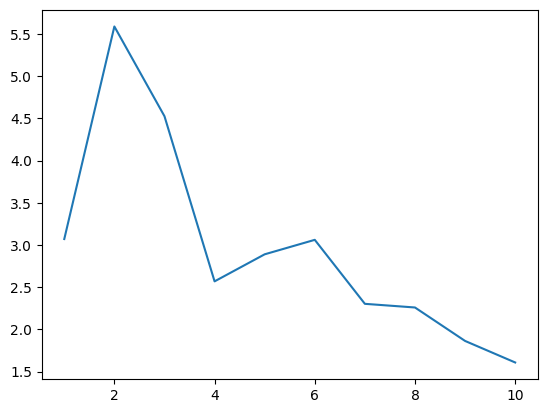

In [10]:
powers = np.arange(1,11)
strassens = np.zeros(len(powers))
naives = np.zeros(len(powers))
prop = np.zeros(len(powers))
for i in range(len(powers)):
  n = 2**powers[i]
  A = np.random.randint(10, size=(n,n))
  B = np.random.randint(10, size=(n,n))
  #strassen
  start = time.time()
  C1 = strassen(A, B)
  end = time.time()
  strassen_time = end-start
  strassens[i] = strassen_time
  #naive
  start = time.time()
  C2 = multiply(A, B)
  end = time.time()
  naive_time = end-start
  naives[i] = naive_time
  #result
  prop[i] = strassen_time/naive_time
  print("2^", i+1, "done,", strassen_time+naive_time, "seconds,", prop[i])
plt.plot(powers, prop)

In [11]:
print(strassens)
print(naives)
print(prop)

[1.98364258e-04 5.51700592e-04 1.62720680e-03 9.98806953e-03
 9.23745632e-02 5.42309761e-01 3.74885511e+00 2.82521687e+01
 1.88819278e+02 1.32242218e+03]
[6.46114349e-05 9.87052917e-05 3.59535217e-04 3.88884544e-03
 3.19733620e-02 1.77190781e-01 1.62839866e+00 1.25076172e+01
 1.01391004e+02 8.22879993e+02]
[3.0701107  5.58937198 4.52586207 2.56838943 2.88911011 3.06059807
 2.30217281 2.25879703 1.86228827 1.60706567]


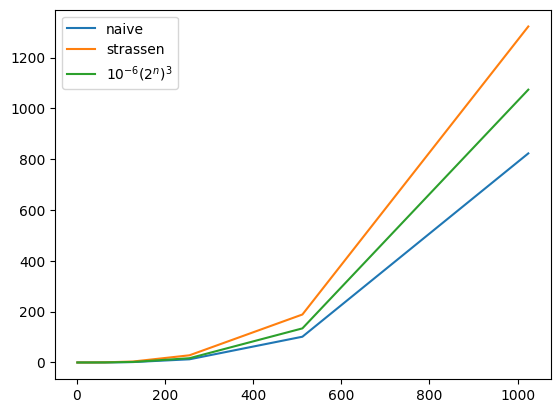

In [12]:
ns = 2**powers
plt.plot(ns, naives, label="naive")
plt.plot(ns, strassens, label="strassen")
plt.plot(ns, (10**(-6))*(2**powers)**3, label="$10^{-6}(2^n)^3$")
plt.legend()
plt.show()